<a href="https://colab.research.google.com/github/AmberLee2427/minicourses/blob/main/chapter5/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
body, h1, h2, h3, h4, h5, h6, p, div, span {
    font-family: "Helvetica Neue", Helvetica, Arial, sans-serif !important;
}
</style>

# <font face="Helvetica" size="7">Chapter 5: Mini Data Challenge</font>  

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

<i> Authors: Amber Malpas, Katarzyna Kruszyńska, Somayeh Khakpash, Ali Crisp </i>

<br>

If you would like an introduction to python notebooks, please read this tutorial: https://medium.com/codingthesmartway-com-blog/getting-started-with-jupyter-notebook-for-python-4e7082bd5d46

Please note, you must **save this notebook in a space owned by you** (a GitHub repo, gist, to Google Drive, or locally) if you want to come back to it later without losing your progress. You can edit and run this notebook on Colab, but it **will not auto save** for you.

If you choose to use lcoal resources your notebook will use your local packages, so you should follow install a virtual environment with the following packages. Run the cell below to create a downloadable `.yml` file, to automate the package install process (provided you are using anaconda).

In [1]:
yaml = '''name: roman_fit
channels:
  - conda-forge
dependencies:
  - python=3.11
  - numpy
  - matplotlib
  - pandas
  - scipy
  - jupyter
  - ipython
  - beautifulsoup4
  - lxml              # required parser for bs4
  - pip
  - pip:
      - pathos
      - MulensModel'''

# save the yaml
with open('environment.yml', 'w') as f:
    f.write(yaml)

Click the folder button on the side bar to open the file explorer. The file `environment.yml` should be in there now. Just click the triple dots on the side and then `Download` to download the `.yml` file.

```bash
conda env create -f environment.yml
```

Running the above line in a terminal (Anaconda Prompt on Windows) will create a virtual conda environment called `minicourse`, which has the required packages installed.

You can activate the environment with:

```bash
conda activate minicourse
```

From here you have two options

1. You can open the notebook running
```bash
jupyter notebook
```
from a parent folder to your locally saved version of this notebook and navigating to the notebook in your browser. You may need to select `minicourse` as your kernel before running the notebook.

2. Alternatly, you can create a local "Runtime" and for your Colab notebook by following [these instructions](https://www.google.com/url?q=https%3A%2F%2Fresearch.google.com%2Fcolaboratory%2Flocal-runtimes.html).
```bash
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --no-browser
```

  ⚠️ We don't generally recommend that you do this with notebooks that you didn't write as it give them access to your local machine

<!--
## <font face="Helvetica" size="6"> Dev Notes </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">
-->



<!-- ### <font face="Helvetica" size="5"> Overview </font>

The current plan is to give the students a miniature "season" of data to fit (as in a couple hundred lightcurves), and an example of how to fit a whole season in a notebook. This example will be using pyLiMA for the model fitting. If we are using Mulens Model we will probably just have to pretend that the observatory is on Earth.

The data will be the same set that the C4 data come from.

The notebook should probably include a pyLiMASS example.

### <font face="Helvetica" size="5"> Links to Content </font>

https://lsu.app.box.com/s/qx440yp9ekzrhaevtfu7ksnfgh2jhc29

https://drive.google.com/drive/folders/1jNKztBVCQHZTs5iPVJDFTy1btLGn15s3?usp=drive_link

We need a single lens set. I might have to generate it. Or ask Ali to.

### <font face="Helvetica" size="5"> Ideas </font>

* Mass measurement?
* Astrometric microlensing?
* False positives in the data?
* Demographics?

### <font face="Helvetica" size="5"> Note </font>

> I'm staring by just doing a bunch of coding examples. I'll remove pieces and turn them in to exercises after.
-->

<!--
> ### Rough Plan
>
>**Chapter 5: Mini Data Challenge – Bulk Microlensing Analysis**
>
> 1. **Introduction**  
>    - Briefly explain the motivation for bulk data analysis in the Roman era: processing hundreds or thousands of events without manually tweaking each one.  
>    - Emphasize that while Chapter 4 focused on hands-on analysis for individual events, Chapter 5 is about scaling up—addressing the pitfalls and nuances encountered when working with large datasets.
>
> 2. **Single Event Fit**
>    - Recap of Chapter 4
>    -  **Special Topics** (Optional Sections):
>      - **Astrometry:**  
>        Outline how astrometric microlensing can provide additional constraints, noting that this is an extra module for those interested.  
>      - **Mass Estimates:**  
>        Provide a brief discussion (and possibly code snippets) on deriving mass estimates from parallax and finite source effects, with the understanding that full implementation is an advanced topic.
>
> 3. **Small subset**
>    - Set up the framework for fitting the entire season as an exercise.   
>    - Test in out on a small subset of the data
>    - **Parallelization for Computational Efficiency**  
>      - Describe the challenges of running heavy computations in a Jupyter Notebook, especially the "frozen function" issue when parallelizing.  
>      - Demonstrate a small-scale example of in-notebook parallelization on the same small subset
>      - Explain that kernel restarts may be necessary when modifying functions.
>
>    - **Future Directions and Advanced Topics**  
>      - Briefly outline how an automated anomaly detection method (e.g., using a windowed reduced chi-squared metric) could help flag problematic events for further analysis.  
>      - Provide links or references (e.g., RTModel documentation) for students who want to delve deeper into automation.
>
> 4. **Full Season**
>    - Fit a mini season's worth of microlensing events
>    - **Initial Fitting and Residual Inspection**
>      - **Parameter Degeneracies, Priors and Bounds:**  (This should be mostly covered in Chapter 4)
>
>        Discuss the degeneracies (e.g., u_0, t_E vs. F_B) and how to set sensible priors (e.g. log rho) or bounds(e.g. u_0>0).
>      - **Inintial Parameter Estimates**
>        Run a mini-season-wide basic fit (using a basic PSPL fit) on all events. This model is covered in Chapter 4, we are just smashing through it to get our parameter estimates for a higher order fit.
>      - Explain how deviations in the residuals can indicate the need for a more complex (binary) model.  
>    - **False Positives**
>      - **Manual Inspection:**  
>        Show a subset of around 10 lightcurves for detailed manual inspection.
>      - Somayeh: include a discussion on false positives and how to recognize them and, ideally, include them in the dataset.
>    - **Higher Order Effects**
>      - turn on the higher order effects needed for mass estimates and let it go.
>
>    - **Mass**
>      Leave this as a homework exercise
>
> 5. **Advanced Fitting Techniques for Complex Events**  (Move this to Chpater 4 and leave it as information, not an exercise)
>    - **Robust Sampling Methods:**  
>      Introduce why gradient descent methods fail for binary events, and present **emcee** (or another MCMC sampler) as a better alternative for exploring spastic likelihood spaces.  
>    - **Priors**  
>    - **Binary-Lens Degeneracies:**  
     Mention that a broad grid search is often employed to explore the parameter space thoroughly, though we won’t implement this in full here.

-->


## <font face="Helvetica" size="6"> 1. Introduction </font>

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Welcome to **Chapter 5: Mini Data Challenge - Bulk Microlensing Analysis**.

In this chapter, we shift from the carefully guided world of single-event modeling into the messier, faster, and far more chaotic domain of bulk lightcurve analysis. You'll go from fitting one event at a time to building the infrastructure that lets you handle dozens—eventually thousands—automatically.

### <font face="Helvetica" size="5"> Why Are We Doing This? </font>

With the upcoming Roman Space Telescope, the volume of microlensing events is expected to abruptly increase with. Simulations suggest the number of microlensing events observed by Roman, in its lifetime, will be on the order of tens of thousands. Event analysis is expected to become primarily an automated, buck-processing endaevor. Manually tuning each fit just isn't practical. Instead, we need a streamlined approach that lets us quickly process bulk data while still catching those subtle details. That kind of thinking is what we are going to emulate in this chapter.


### <font face="Helvetica" size="5"> What's in It for You? </font>

Our aim is to provide you with a realistic view of what working with bulk microlensing data involves. This chapter is designed to help you build confidence in managing large datasets while also preparing you for the more complex tasks you'll encounter in your future research.

You'll simulate the process of fitting a full observing season: downloading data, defining objective functions, writing event finders, applying priors, parallelizing computation, and adapting to subtle data challenges in real time.

This isn't just about models—it's about workflow. It's about thinking like a pipeline without losing your scientific instincts.

### <font face="Helvetica" size="5"> What Will You Learn? </font>
* How to fit single-lens microlensing events **at scale**
* How to structure your code for **repeatability and automation**
* How to apply **priors** that penalize unphysical results (like negative flux)
* Understand the limitations of simpler fitting methods and see how advanced tools like **emcee** can help you explore complex likelihood spaces.
* How to integrate tools like **MulensModel** with your own logic
* How to use **pathos** for notebook-friendly parallelization
* How to spot when your tools are starting to break—and why that's a feature, not a flaw

You'll also get:
* Hands-on experience with real OGLE EWS data
* The chance to write your own event-finding algorithm
* An optional full-season Roman simulation challenge to pull it all together

<!--
### <font face="Helvetica" size="5"> Dev Notes </font>
-->

<!--
>  [x] Where are we going to get the data from? WG7?
>>> Old data challenge data
>
>  [x] Where are we hosting this?
>>> Static notebooks in the same place as the slides and links to colab.
>
>  [x] yaml/ install instruction, if we aren't on Colab
>>> W are staying in Colab. Install inline.
>
>  [x] css integration, if we aren't on Colab
>>> It works for the static notebook so this could still be worth while.
-->



## <font face="Helvetica" size="6"> 2. Racap of the Single-Lens Fit </font>

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">


In [2]:
#@title Imports and Setup

# system tools
import os
import sys
from io import StringIO
import time
from typing import Tuple, Callable, Optional, List
import shutil

# data analysis tools
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display
from scipy.optimize import minimize

# web scrapping tools
import bs4 as bs
import urllib
import urllib.request
import pandas as pd

# parallel processing tools
!pip install pathos
from pathos.multiprocessing import ProcessingPool as Pool  # for multiprocessing inside jupyter
import multiprocessing as mp  # Ensure this is imported

# microlensing tool
!pip install MulensModel
import MulensModel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.1/634.1 kB 7.6 MB/s eta 0:00:00


### <font face="Helvetica" size="5"> 2.1 Mulens Model Package Fix </font>

Follow the instructions in this section **if you haven't already got a working version of Mulens Model**.

You can check whether your version is working by generating the plot in [Section 2.2](#section-22).

In [3]:
#@title Removing the 'data' file inside `mulensmodel_dir`

mulensmodel_dir = os.path.dirname(MulensModel.__file__)
data_file_path = os.path.join(mulensmodel_dir, 'data')

if os.path.exists(data_file_path):
  if os.path.isfile(data_file_path):
    os.remove(data_file_path)
  else:
    shutil.rmtree(data_file_path)
  print(f"Removed 'data' file or directory from {mulensmodel_dir}")
else:
  print(f"No 'data' file or directory found in {mulensmodel_dir}")

Removed 'data' file or directory from /usr/local/lib/python3.11/dist-packages/MulensModel


In [4]:
#@title Replace this path with the path printed above, if they are different
!ls /usr/local/lib/python3.11/dist-packages/MulensModel

AdaptiveContouring.cpython-311-x86_64-linux-gnu.so
b0b1utils.py
binarylensimports.py
binarylens.py
binarylenswithshear.py
causticsbinary.py
causticsbinarywithshear.py
causticspointwithshear.py
coordinates.py
elliputils.py
event.py
fitdata.py
horizons.py
__init__.py
limbdarkeningcoeffs.py
magnificationcurve.py
modelparameters.py
model.py
mulensdata.py
mulensobjects
orbits
pointlens.py
pointlenswithshear.py
__pycache__
satelliteskycoord.py
tests
trajectory.py
uniformcausticsampling.py
utils.py
VBBL.cpython-311-x86_64-linux-gnu.so
version.py


In [5]:
#@title Clone the MulensModel directory from git
!git clone https://github.com/rpoleski/MulensModel.git


Cloning into 'MulensModel'...
remote: Enumerating objects: 27180, done.
remote: Counting objects: 100% (3614/3614), done.
remote: Compressing objects: 100% (388/388), done.
remote: Total 27180 (delta 3419), reused 3266 (delta 3222), pack-reused 23566 (from 4)
Receiving objects: 100% (27180/27180), 48.61 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (18401/18401), done.


In [6]:
#@title Copy the data folder to the package location

print('Cuurent Working Directory:')
!ls

print('\nMulensModel Directory:')
!ls MulensModel

# copy the data folder to the package location
# you may need to change these file paths, depending on where you run this notebook
!cp -r ./MulensModel/data /usr/local/lib/python3.11/dist-packages/MulensModel

print('\nMulensModel Package Directory:')
!ls /usr/local/lib/python3.11/dist-packages/MulensModel

print('\ndata Directory:')
!ls /usr/local/lib/python3.11/dist-packages/MulensModel/data

Cuurent Working Directory:
environment.yml  MulensModel  sample_data

MulensModel Directory:
AUTHORS.md	 developers_board.md  LICENSE	      requirements.txt
CITATION.cff	 docs		      MANIFEST.in     setup.py
CONTRIBUTING.md  documents	      pyproject.toml  source
data		 examples	      README.md

MulensModel Package Directory:
AdaptiveContouring.cpython-311-x86_64-linux-gnu.so
b0b1utils.py
binarylensimports.py
binarylens.py
binarylenswithshear.py
causticsbinary.py
causticsbinarywithshear.py
causticspointwithshear.py
coordinates.py
data
elliputils.py
event.py
fitdata.py
horizons.py
__init__.py
limbdarkeningcoeffs.py
magnificationcurve.py
modelparameters.py
model.py
mulensdata.py
mulensobjects
orbits
pointlens.py
pointlenswithshear.py
__pycache__
satelliteskycoord.py
tests
trajectory.py
uniformcausticsampling.py
utils.py
VBBL.cpython-311-x86_64-linux-gnu.so
version.py

data Directory:
ephemeris_files			       interpolation_table_b0b1_v1.dat
expected_example_output		       interpolation_ta

In [7]:
import warnings

# Suppress *just that specific warning* because we know what its doing and
# we want to keep the output clean
warnings.filterwarnings("ignore", message=".*does not have a limb-darkening coefficient.*")


### <font face="Helvetica" size="5"> 2.2 Single-Lens Fitting with Mulens Model <a id="section-22"></a> </font>


In [8]:
#@title Available finite source methods

finite_source_methods = [
    # Uniform source
    'finite_source_uniform_Gould94',               # 0, 10E-3 < rho < 1 (has a bug)
    'finite_source_uniform_Gould94_direct',        # 1, 10E-3 < rho < 1
    'finite_source_uniform_WittMao94',             # 2, rho < 0.01
    'finite_source_uniform_Lee09',                 # 3, rho > 0.01

    # Limb-darkened source
    'finite_source_LD_WittMao94',                  # 4, rho < 0.01
    'finite_source_LD_Yoo04',                      # 5, 10E-3 < rho < 1
    'finite_source_LD_Yoo04_direct',               # 6, 10E-3 < rho < 1
    'finite_source_LD_Lee09'                       # 7, rho > 0.01
]

Let's take a look at how different higher-order effects change the magnification model.  

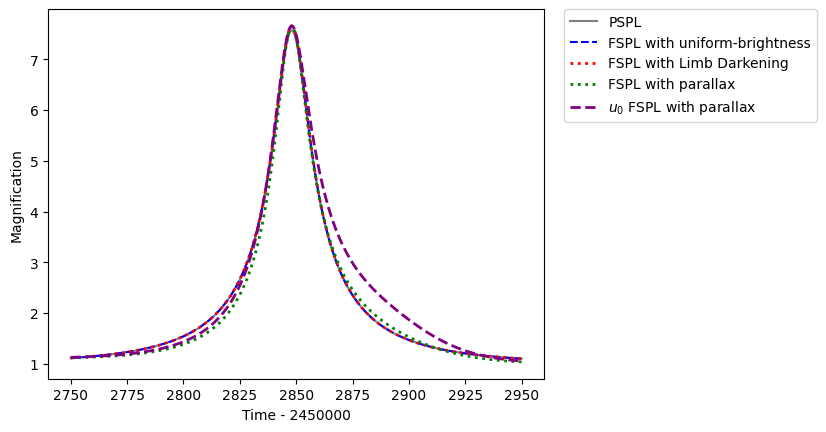

In [47]:
#@title Plotting the magnification models

# plot bounds
t_min = 2452750
t_max = 2452950
t_range = [t_min, t_max]

# Model parameters
t_0 =  2452848.06
u_0 = 0.133
t_E = 61.5
log_rho = -1.4 #@param {type:"slider", min:-3, max:0, step:0.1}
rho = 10**log_rho
pi_E_E = -1.4 #@param {"type":"slider","min":-5,"max":5,"step":0.1}
pi_E_N = 1.7 #@param {type:"slider", min:-5, max:5, step:0.1}
t_0_par = 2452848.06 # should not change during modelling and needs to be close to t_0

# Define a point source, point lens model
pspl = MulensModel.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

# Define a finite source, point lens model
fspl = MulensModel.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E, 'rho': rho})

# Define a parallax model
fspl_pllx = MulensModel.Model({'t_0': t_0,
                          'u_0': u_0,
                          't_E': t_E,
                          'rho': rho,
                          'pi_E_E': pi_E_E,
                          'pi_E_N': pi_E_N,
                          't_0_par': t_0_par
                          },
                         ra='18:04:45.71',
                         dec='-26:59:15.2'
                         )

# Plot the magnification curve:
plt.close(0)
plt.figure(0)
pspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='grey',
    linestyle='-',
    label='PSPL'
    )

# calculate the magnification curve using a finite source model
fspl.set_magnification_methods([2450000., finite_source_methods[1], 2470000.])  # rho = 0.1
fspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='blue',
    linestyle='--',
    label='FSPL with uniform-brightness'
    )

# calculate the magnification curve using a finite source model with limb darkening
fspl.set_magnification_methods([2450000., finite_source_methods[5], 2470000.])  # rho = 0.1
fspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='red',
    linestyle=':',
    linewidth=2,
    label='FSPL with Limb Darkening'
    )

# calculate the magnification curve using a finite source model and parallax
fspl_pllx.set_magnification_methods([2450000., finite_source_methods[1], 2470000.])  # rho = 0.1
fspl_pllx.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='green',
    linestyle=':',
    linewidth=2,
    label='FSPL with parallax'
    )


# calculate the u_0 finite-source, parallax solution
fspl_pllx.set_magnification_methods([2450000., finite_source_methods[3], 2470000.])
parameters = ["t_0", "u_0", "t_E", "rho", "pi_E_E", "pi_E_N", "t_0_par"]
setattr(fspl_pllx.parameters, "u_0", -u_0)  # multiply u0 by -1
fspl_pllx.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='purple',
    linestyle='--',
    linewidth=2,
    label=r'$u_0$ FSPL with parallax'
    )

plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

If your version of Mulens model is working, this figure should have rendered without an error.

> There are a few things to take away from this plot:
> * the finite source effect has a big affect on the shape of the magnification curve
> * the surface brightness model (e.g., uniform) for the source has much less of an affect
> * the degenerate parallax solutions may be noticably different with sufficiently large parallax
> * parallax does not need to be as big, for the affect to noticably change the magnification curve, compared with a static model.

> **Exercise X**
>
> Try playing with the parallax (`"pi_E_N"`, `"pi_E_E"`) and finite source (`"rho"`)parameters and see how they  change your magnification model.

> *Note. This is not an interactive plot. You have to run the cell again after moving the slider.*

## <font face="Helvetica" size="6"> 3. OGLE EWS Bulk Lightcurve Fit </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

The Roman style data have many epoch which make the evaluation of a magnification model take a long time. Ground -based data, on the other hand have much fewer epochs and alert pages, such as OGLEs EWS, which estimate fit parameters for us. We are going to design our bulk fit on these much more tractible data and then apply it to a simulated Roman season later.



### <font face="Helvetica" size="5"> 3.1 Getting the ground-based data <a id="section-22"></a> </font>

Let's start this process by scraping for some lightcurves and microlensing model parameter estimates.

In [10]:
#@title Web scrapping functions

def get_data_url(event: str) -> str:
    '''Takes an event name and returns the URL for the data page.'''

    event = event.split('-') # split the event name into its components, seperated by '-'
    year = event[0]  # the first component is the year
    region = event[1].lower()  # the second component is region (e.g., blg or gd), which we need to make lower case.
    number = event[2]  #
    url = f'https://www.astrouw.edu.pl/ogle/ogle4/ews/{year}/{region}-{number}/phot.dat'

    return url

def fetch_event_data(url: str) -> pd.DataFrame:
    '''Takes a url and returns the data as a pandas dataframe.'''

    # Read the data from the URL
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')

    # Convert the data to a pandas DataFrame
    #df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])
    df = pd.read_csv(StringIO(data), sep=r'\s+', header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])

    return df

# Test
event = '2017-BLG-0001'
event_data_url = get_data_url(event)
data = fetch_event_data(event_data_url)
print(data)

               HJD  I magnitude  magnitude error  seeing  sky level
0     2.457060e+06       17.644            0.034    7.59     1155.0
1     2.457061e+06       17.665            0.027    6.44      945.0
2     2.457061e+06       17.652            0.025    4.90     1305.0
3     2.457062e+06       17.682            0.024    5.85      934.0
4     2.457062e+06       17.702            0.023    5.10     1085.0
...            ...          ...              ...     ...        ...
2657  2.458047e+06       17.666            0.031    7.25      996.0
2658  2.458049e+06       17.661            0.018    4.33      703.0
2659  2.458049e+06       17.682            0.017    4.14      844.0
2660  2.458054e+06       17.672            0.035    6.18     1496.0
2661  2.458054e+06       17.686            0.041    7.01     1568.0

[2662 rows x 5 columns]


Great. Now that we have functions to fetch lightcurves from the OGLE EWS website, we can just grab those when we need them. But we also need some good parameter estimates if we don't want our fits to take eternity to run, or potentially fail to find the likelihood maximum. Estimating these parameters is part of the EWS process, so we can shamlessly steal from those for this exercise.

In [11]:
#@title More web scraping (this time for the EWS table)

def fetch_table_data(url):
    '''Takes a URL and returns the first table as a pandas DataFrame.'''
    source = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(source, 'lxml')
    table = soup.find_all('table')
    df = pd.read_html(StringIO(str(table)))[0]

    return df

ews_url = "https://ogle.astrouw.edu.pl/ogle4/ews/ews.html"  # https://ogle.astrouw.edu.pl/ogle4/ews/2024/ews.html for last year
ews_df = fetch_table_data(ews_url)
print(ews_df)

     Unnamed: 0          Event      Field  Star No   RA (J2000)  Dec (J2000)  \
0           NaN  2025-BLG-0001  BLG497.22    26223  17:19:44.68  -27:43:21.4   
1           NaN  2025-BLG-0002  BLG498.16    23293  17:17:24.61  -29:19:44.8   
2           NaN  2025-BLG-0003  BLG498.24   149001  17:18:03.34  -28:50:21.4   
3           NaN  2025-BLG-0004  BLG498.29     2940  17:20:03.15  -28:41:15.5   
4           NaN  2025-BLG-0005  BLG499.29    47835  17:19:54.58  -29:57:28.0   
..          ...            ...        ...      ...          ...          ...   
566         NaN  2025-BLG-0557  BLG930.19    38047  17:27:05.46  -39:28:41.0   
567         NaN  2025-BLG-0558  BLG930.22    33879  17:24:37.60  -39:32:09.9   
568         NaN   2025-DG-0009  DG1021.12    15850  18:48:56.01   -8:32:08.9   
569         NaN   2025-GD-0003  GD1133.07     8587  16:19:04.60  -52:17:27.7   
570         NaN   2025-GD-0004  GD1167.21    56473  15:56:34.55  -57:42:24.1   

      Tmax (HJD)      Tmax (UT)     tau

Let's just loop through all the events and add the data URLs to the pandas dataframe, for convenience.

In [12]:
#@title Adding a URL column to the data frame

# Add a new column to the EWS data frame ('ews_df'), using the column name 'event data url'.
ews_df['event data url'] = ews_df['Event'].apply(get_data_url)
print(ews_df)
print(min(ews_df['Tmax (HJD)']), max(ews_df['Tmax (HJD)']))
print(min(ews_df['Umin']), max(ews_df['Umin']))
print(min(ews_df['tau']), max(ews_df['tau']))

     Unnamed: 0          Event      Field  Star No   RA (J2000)  Dec (J2000)  \
0           NaN  2025-BLG-0001  BLG497.22    26223  17:19:44.68  -27:43:21.4   
1           NaN  2025-BLG-0002  BLG498.16    23293  17:17:24.61  -29:19:44.8   
2           NaN  2025-BLG-0003  BLG498.24   149001  17:18:03.34  -28:50:21.4   
3           NaN  2025-BLG-0004  BLG498.29     2940  17:20:03.15  -28:41:15.5   
4           NaN  2025-BLG-0005  BLG499.29    47835  17:19:54.58  -29:57:28.0   
..          ...            ...        ...      ...          ...          ...   
566         NaN  2025-BLG-0557  BLG930.19    38047  17:27:05.46  -39:28:41.0   
567         NaN  2025-BLG-0558  BLG930.22    33879  17:24:37.60  -39:32:09.9   
568         NaN   2025-DG-0009  DG1021.12    15850  18:48:56.01   -8:32:08.9   
569         NaN   2025-GD-0003  GD1133.07     8587  16:19:04.60  -52:17:27.7   
570         NaN   2025-GD-0004  GD1167.21    56473  15:56:34.55  -57:42:24.1   

      Tmax (HJD)      Tmax (UT)     tau

Nice! Now we have some data to test on. And some web scraping skills under our belts too. We should quickly test this with a single lightcurve, and plot the model from the OGLE EWS table.

> **Exercise X**
>
> Complete the plot below.

2025-BLG-0001
Index(['Unnamed: 0', 'Event', 'Field', 'Star No', 'RA (J2000)', 'Dec (J2000)',
       'Tmax (HJD)', 'Tmax (UT)', 'tau', 'Umin', 'Amax', 'Dmag', 'fbl', 'Ibl',
       'I0', 'event data url'],
      dtype='object')


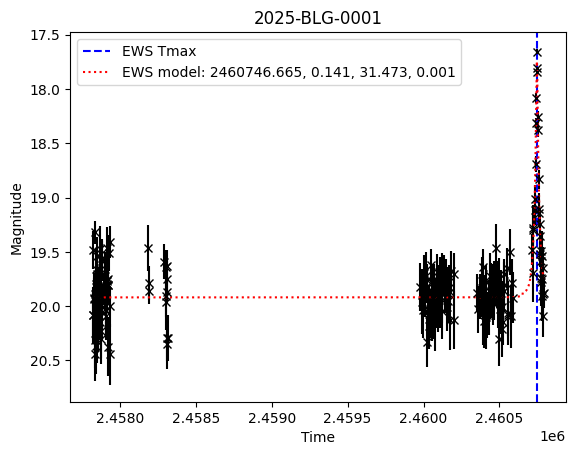

In [13]:
#@title Plotting the '2025-BLG-0001' event with the EWS model


# [ ] add parallax to the model.
# [ ] edit to include the other ews parameters


# Function to process a single event
def plot_event_data(i, ews_df):
    event = ews_df['Event'][i]
    print(event)
    print(ews_df.columns)
    url = ews_df['event data url'][i]
    data = fetch_event_data(url)
    t_0_0 = ews_df['Tmax (HJD)'][i]
    u_0_0 = ews_df['Umin'][i] * 1.1  # initial guess
    t_E_0 = ews_df['tau'][i] * 1.1  # initial guess
    rho_0 = 0.001  # initial guess


    plt.close(i+1)
    plt.figure(i+1)

    plt.errorbar(data['HJD'],
                  data['I magnitude'],
                  yerr=data['magnitude error'],
                  fmt='x',
                  color='black'
                  )
    plt.axvline(ews_df['Tmax (HJD)'][i], color='blue', linestyle='--', label='EWS Tmax')

    plt.title(event)
    plt.xlabel('HJD')
    plt.ylabel('I magnitude')

    # Data as a list of numpy arrays
    data_list = [data['HJD'].to_numpy(), data['I magnitude'].to_numpy(), data['magnitude error'].to_numpy()]

    # Pack everything into MulensModel objects
    data_object = MulensModel.MulensData(data_list=data_list,
                                plot_properties={'color': 'thistle',
                                                 'label': 'OGLE',
                                                 'marker': 'x',
                                                 'markersize': 2
                                                 },
                                phot_fmt='mag',
                                bandpass='I'
                                )
    fspl_model = MulensModel.Model({'t_0': t_0_0, 'u_0': u_0_0, 't_E': t_E_0, 'rho': rho_0})
    fspl_model.set_magnification_methods([t_0_0 - 3.0 * t_E_0,
                                          'finite_source_uniform_Gould94',
                                          t_0_0 + 3.0 * t_E_0
                                          ],
                                          source=None
                                          )  # rho <= 0.1
    event_object = MulensModel.Event(datasets=data_object, model=fspl_model)

    parameters_to_fit = ["t_0", "u_0", "t_E", "rho"]

    # Plot the initial model
    event_object.plot_model(color='r',
                            linestyle=':',
                            t_range=[min(data['HJD']),
                                     max(data['HJD'])
                                    ],
                            label='EWS model: %1.3f, %1.3f, %1.3f, %1.3f' %(t_0_0, u_0_0, t_E_0, rho_0)
                            )

    plt.legend()
    plt.savefig(f'./{event}.png', bbox_inches='tight')
    plt.show()

plot_event_data(0, ews_df)


Is it working?

If so, we can move on and test our fitting algorithms.

First, we’ll need an **objective function** — a way to measure how well our model fits the data (or, more precisely, how likely the model is to have generated the data, assuming Gaussian noise).

### <font face="Helvetica" size="5"> 3.2 Fitting basic PSPL model to <a id="section-22"></a> </font>

In [42]:
def mulens_neglogP_function(theta, parameters_to_fit, event, verbose=False):
    ''' negative log prob function for MulensModel fitting '''

    # Create a dictionary from theta values for easier access
    params = dict(zip(parameters_to_fit, theta))

    # unpack params
    t_0_value = params['t_0']
    u_0_value = params['u_0']
    t_E_value = params['t_E']
    # rho is handled later

    # Prior Checks
    # Check bounds using the names from parameters_to_fit
    # Use .get(key, default) to avoid KeyError if a parameter isn't being fit
    if not ((2460600) <= t_0_value <= (2461000)):  # this needs to change if you
                                                   # use this code to fit a different
                                                   # season
        return np.inf
    if not (0.000001 <= u_0_value <= 2.5): # Use -1 default if u_0 can't be 0
        return np.inf
    if not (0.1 <= t_E_value <= 700):
        return np.inf

    # Handle rho or log_rho prior
    if 'rho' in params:
        rho_value = params['rho']
        if not (0 <= rho_value <= 0.2): # Assuming rho >= 0 is desired
            return np.inf
    elif 'log_rho' in params:
        log_rho_value = params['log_rho']
        # Check log_rho lower bound first
        if log_rho_value < -10: # Check the log value directly
             return np.inf
        rho_value = 10**log_rho_value # Convert to rho for the upper bound check
        if rho_value > 0.2: # Check rho upper bound
             return np.inf

    # Update Model Parameters
    # If all prior checks passed, NOW update the model
    setattr(event.model.parameters, 't_0', t_0_value)
    setattr(event.model.parameters, 'u_0', u_0_value)
    setattr(event.model.parameters, 't_E', t_E_value)
    setattr(event.model.parameters, 'rho', rho_value)
    # Add other parameters if needed

    # Calculate Chi2
    dataset = event.datasets[0]
    event.fit_fluxes() # This needs the model parameters to be set correctly
    ([FS], FB) = event.get_flux_for_dataset(dataset)
    penalty = 0.0
    # penalty = ((FB / 100)**2) # why 100? I told you, vibes.

    if verbose:
        print(f'FS: {FS}, FB: {FB}')

    # Flux priors (check AFTER fitting fluxes)
    if FS <= 0 or (FS + FB) <= 0:
        return np.inf # Return inf if fluxes are non-physical

    chi2 = event.get_chi2()
    if verbose:
        print('chi2 = ', chi2)
    # Return the objective function value (negative log likelihood ~ chi2/2)
    # Scipy minimize finds the minimum, so we return chi2 (or chi2/2)
    return chi2/2.0 + penalty # Technically negLogP is chi2/2 + constant


 2025-BLG-0001
-----------------
t_0_0: 2460746.665
u_0_0: 0.141
t_E_0: 31.473
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-02 00:15:12
-----------------
Time elapsed: 11.082301616668701 seconds
-----------------
FS: 7.760114080144394, FB: -0.8986550621144129
chi2 =  220.4311708879827
-----------------
t_0: 2460746.674 (2460746.674)
u_0: 0.143 (0.143)
t_E: 26.293 (26.293)
rho: 0.00073 (-3.13663)
-----------------
Final -logP check: 110.21558544399134
-----------------
Initial chi2 (from initial guess): 240.1112501605317
Final chi2 (from event object): 220.4311708879827
Delta chi2: -19.680079272549023
Delta chi2/dof:  -0.09507284672728997
-----------------


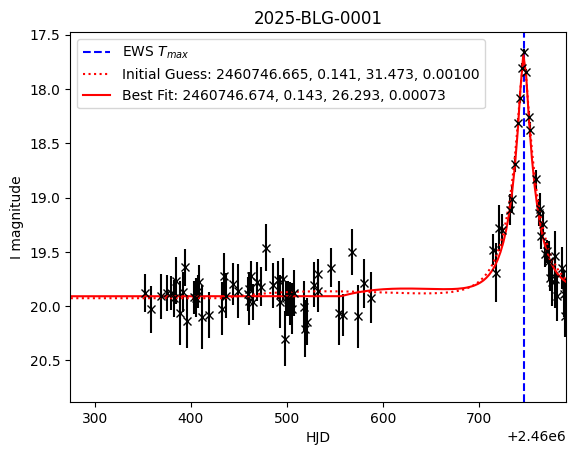


 2025-BLG-0002
-----------------
t_0_0: 2460710.957
u_0_0: 0.213
t_E_0: 90.903
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-02 00:15:23
-----------------
Time elapsed: 1.5901427268981934 seconds
-----------------
FS: 2.090399576697594, FB: 13.48447804360361
chi2 =  332.710444525477
-----------------
t_0: 2460717.764 (2460717.764)
u_0: 0.031 (0.031)
t_E: 306.688 (306.688)
rho: 0.00037 (-3.43269)
-----------------
Final -logP check: 166.3552222627385
-----------------
Initial chi2 (from initial guess): 422.8791484629112
Final chi2 (from event object): 332.710444525477
Delta chi2: -90.1687039374342
Delta chi2/dof:  -0.3621233089856795
-----------------


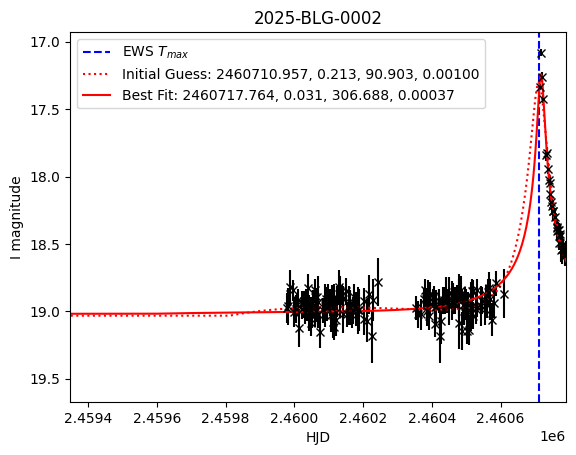


 2025-BLG-0003
-----------------
t_0_0: 2460737.016
u_0_0: 0.113
t_E_0: 21.401
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-02 00:15:25
-----------------
Time elapsed: 2.2499184608459473 seconds
-----------------
FS: 6.078067808630923, FB: -1.4430994922012428
chi2 =  27.02181123583957
-----------------
t_0: 2460737.040 (2460737.040)
u_0: 0.133 (0.133)
t_E: 16.044 (16.044)
rho: 0.00129 (-2.89033)
-----------------
Final -logP check: 13.510905617919786
-----------------
Initial chi2 (from initial guess): 33.76389171576846
Final chi2 (from event object): 27.02181123583957
Delta chi2: -6.742080479928887
Delta chi2/dof:  -0.13484160959857774
-----------------


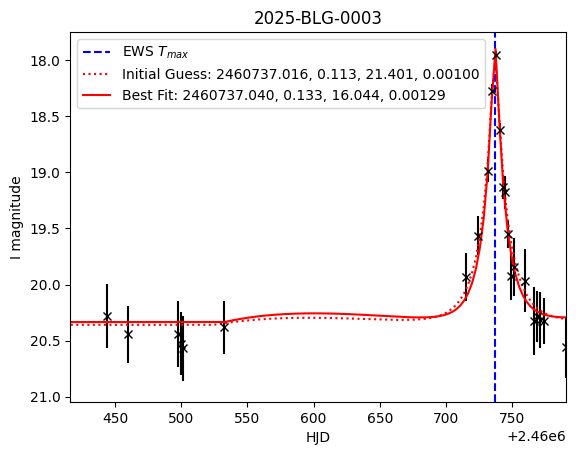


 2025-BLG-0004
-----------------
t_0_0: 2460704.831
u_0_0: 1.422
t_E_0: 73.446
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-02 00:15:28
-----------------
Time elapsed: 1.7523207664489746 seconds
-----------------
FS: 91.70230710044912, FB: 97.31251773128524
chi2 =  361.5105532457742
-----------------
t_0: 2460708.346 (2460708.346)
u_0: 0.910 (0.910)
t_E: 83.778 (83.778)
rho: 0.00092 (-3.03572)
-----------------
Final -logP check: 180.7552766228871
-----------------
Initial chi2 (from initial guess): 656.9376737215612
Final chi2 (from event object): 361.5105532457742
Delta chi2: -295.427120475787
Delta chi2/dof:  -1.1723298431578848
-----------------


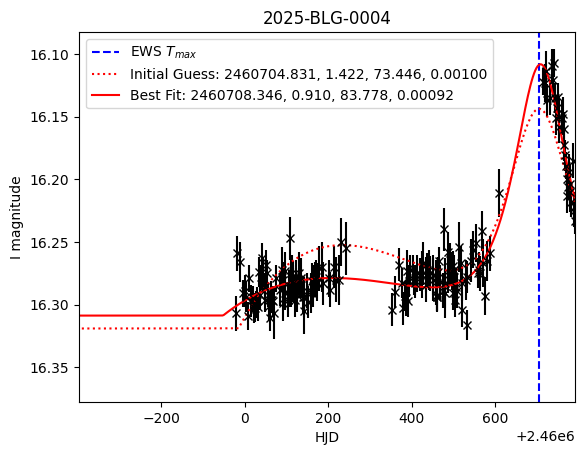


 2025-BLG-0005
-----------------
t_0_0: 2460742.481
u_0_0: 0.006
t_E_0: 39.898
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-02 00:15:30
-----------------
Time elapsed: 1.0886621475219727 seconds
-----------------
FS: 5.104562389805171, FB: 0.41643371245290906
chi2 =  120.13192988659661
-----------------
t_0: 2460742.515 (2460742.515)
u_0: 0.005 (0.005)
t_E: 39.898 (39.898)
rho: 0.00100 (-3.00002)
-----------------
Final -logP check: 60.065964943298304
-----------------
Initial chi2 (from initial guess): 145.91289385004652
Final chi2 (from event object): 120.13192988659661
Delta chi2: -25.780963963449906
Delta chi2/dof:  -0.19831510741115313
-----------------


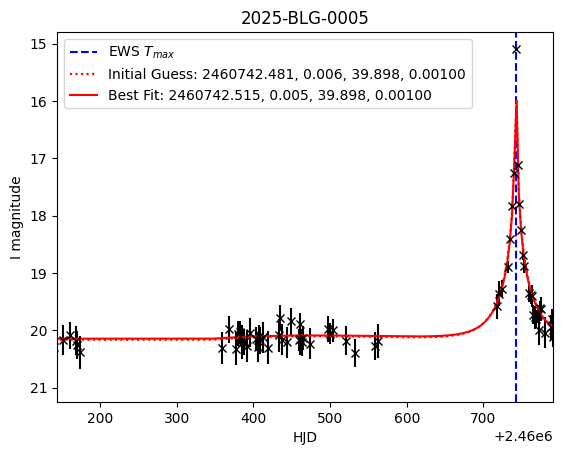


 2025-BLG-0006
-----------------
t_0_0: 2460734.830
u_0_0: 0.000
t_E_0: 12.280
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-02 00:15:32
-----------------
Time elapsed: 4.821813344955444 seconds
-----------------
FS: 6.380567366677366, FB: 2.0873559493284657
chi2 =  12619.506054866051
-----------------
t_0: 2460734.961 (2460734.961)
u_0: 0.000 (0.000)
t_E: 12.713 (12.713)
rho: 0.00138 (-2.86084)
-----------------
Final -logP check: 6309.753027433026
-----------------
Initial chi2 (from initial guess): 12672.695756533663
Final chi2 (from event object): 12619.506054866051
Delta chi2: -53.1897016676121
Delta chi2/dof:  -0.016035484373714833
-----------------


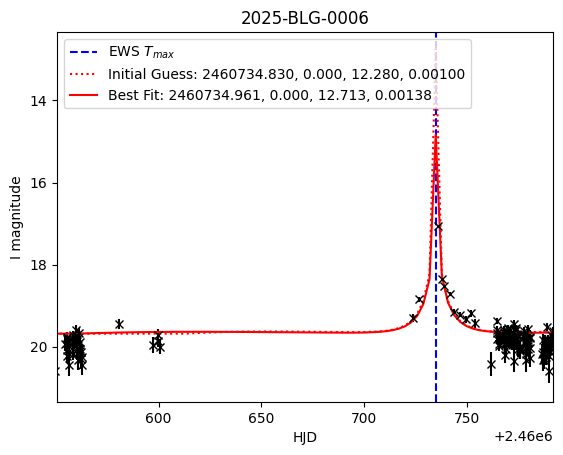


 2025-BLG-0007
-----------------
t_0_0: 2460762.460
u_0_0: 0.185
t_E_0: 155.320
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-02 00:15:37
-----------------
Time elapsed: 145.54859828948975 seconds
-----------------
FS: 40.94965088295888, FB: 35.675151637560916
chi2 =  16342.2565836028
-----------------
t_0: 2460762.375 (2460762.375)
u_0: 0.320 (0.320)
t_E: 84.962 (84.962)
rho: 0.00166 (-2.77906)
-----------------
Final -logP check: 8171.1282918014
-----------------
Initial chi2 (from initial guess): 17898.369439378504
Final chi2 (from event object): 16342.2565836028
Delta chi2: -1556.1128557757038
Delta chi2/dof:  -0.3987987841557416
-----------------


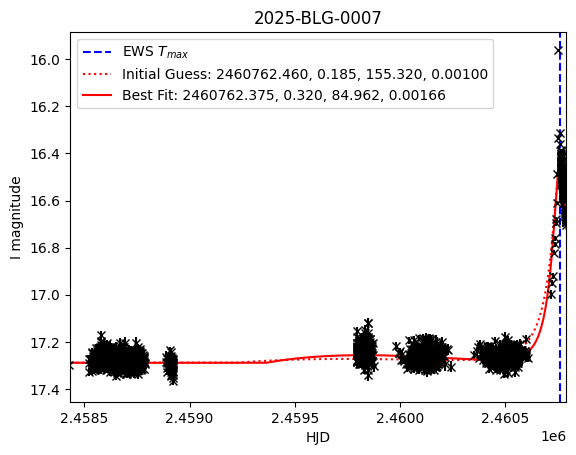


 2025-BLG-0008
-----------------
t_0_0: 2460738.235
u_0_0: 0.300
t_E_0: 21.320
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-02 00:18:04


In [ ]:

# Function to process a single event
def process_event(i, ews_df, n, start_time, verbose=True, log_rho_prior=True):

    # Event stuff
    event = ews_df['Event'][i]
    event_start_time = time.time()
    url = ews_df['event data url'][i]
    data = fetch_event_data(url)

    # Model stuff
    t_0_0 = ews_df['Tmax (HJD)'][i]
    # We are going to change the next guesses from those provided by the EWS, to
    # give our optiizer some room to move
    u_0_0 = ews_df['Umin'][i] * 1.1  # initial guess
    t_E_0 = ews_df['tau'][i] * 1.1  # initial guess
    t_window = (t_0_0 - 15.0 * t_E_0, t_0_0 + 15.0 * t_E_0)
    rho_0 = 0.001  # initial guess

    if t_E_0 > 50:  # liekly remnant (they do derpy stuff in the wings)
        mag_method = finite_source_methods[0]  # Note: `finite_source_uniform_Gould94`
                                               # is not ideal for events where
                                               # rho ≲ 1e-3, but we use it here
                                               # to ensure fast and consistent
                                               # modeling while testing functions.
                                               # For high-mass lenses or precision
                                               # modeling, consider switching to
                                               # `WittMao94` variants (method 2
                                               # or 4).
    else:  # likely MS star
        mag_method = finite_source_methods[0]

    if verbose:
        print('\n', event)
        print('-----------------')
        print(f't_0_0: {t_0_0:1.3f}')
        print(f'u_0_0: {u_0_0:1.3f}')
        print(f't_E_0: {t_E_0:1.3f}')
        print(f'rho_0: {rho_0:1.5f}')
        print(f'Method = {mag_method}')
        print('-----------------')
        print(f'Time started: {time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())}')

    if i % n == 0:
        plt.close(i)
        plt.figure(i)

        plt.errorbar(data['HJD'],
                     data['I magnitude'],
                     yerr=data['magnitude error'],
                     fmt='x',
                     color='black'
                     )
        plt.axvline(ews_df['Tmax (HJD)'][i], color='blue', linestyle='--', label=r'EWS $T_{max}$')

        plt.title(event)

    # Data as a list of numpy arrays
    data_list = [data['HJD'].to_numpy(), data['I magnitude'].to_numpy(), data['magnitude error'].to_numpy()]

    # Pack everything into MulensModel objects
    data_object = MulensModel.MulensData(data_list=data_list,
                                plot_properties={'color': 'thistle',
                                                 'label': 'OGLE',
                                                 'marker': 'x',
                                                 'markersize': 2
                                                 },
                                phot_fmt='mag',
                                bandpass='I'
                                )
    fspl_model = MulensModel.Model({'t_0': t_0_0, 'u_0': u_0_0, 't_E': t_E_0, 'rho': rho_0})

    fspl_model.set_magnification_methods([t_window[0],
                                          mag_method,
                                          t_window[1]
                                          ],
                                          source=None
                                          )  # rho <= 0.1
    event_object = MulensModel.Event(datasets=data_object, model=fspl_model)

    # Plot the initial model
    if i % n == 0:
        event_object.plot_model(color='r',
                                linestyle=':',
                                t_range=[min(data['HJD']),
                                         max(data['HJD'])
                                         ],
                                label='Initial Guess: %1.3f, %1.3f, %1.3f, %1.5f' %(t_0_0, u_0_0, t_E_0, rho_0)
                                )

    # get initial chi2
    initial_chi2 = event_object.get_chi2()

    # index order
    parameters_to_fit = ["t_0", "u_0", "t_E", "rho"]
    if log_rho_prior:
        parameters_to_fit = ["t_0", "u_0", "t_E", "log_rho"]

    # Fit using scipy Nelder-Mead
    if log_rho_prior:
        result = minimize(mulens_neglogP_function,
                          [t_0_0, u_0_0, t_E_0, np.log10(rho_0)],
                          args=(parameters_to_fit,
                          event_object),
                          method='Nelder-Mead'
                          ) # log rho prior
    else:
        result = minimize(mulens_neglogP_function,
                          [t_0_0, u_0_0, t_E_0, rho_0],
                          args=(parameters_to_fit,
                          event_object),
                          method='Nelder-Mead'
                          )

    # Make sure the values in event_object are the best fit values
    neglogP_final = mulens_neglogP_function(result.x, parameters_to_fit, event_object, verbose=False)

    if verbose:
        print('-----------------')
        print(f'Time elapsed: {time.time() - event_start_time} seconds')
        print('-----------------')
        neglogP_final = mulens_neglogP_function(result.x, parameters_to_fit, event_object, verbose=True)
        print('-----------------')
        print(f't_0: {event_object.model.parameters.t_0:1.3f} ({result.x[0]:1.3f})')
        print(f'u_0: {event_object.model.parameters.u_0:1.3f} ({result.x[1]:1.3f})')
        print(f't_E: {event_object.model.parameters.t_E:1.3f} ({result.x[2]:1.3f})')
        print(f'rho: {event_object.model.parameters.rho:1.5f} ({result.x[3]:1.5f})') # Always rho here
        print('-----------------')
        print(f'Final -logP check: {neglogP_final}')
        print('-----------------')
        print(f'Initial chi2 (from initial guess): {initial_chi2}')
        print(f'Final chi2 (from event object): {event_object.get_chi2()}')
        print(f'Delta chi2: {event_object.get_chi2() - initial_chi2}')
        print('Delta chi2/dof: ',(event_object.get_chi2() - initial_chi2) / (len(data['HJD']) - 4))
        print('-----------------')


    # Plot the fit model and show (event_object now has correct params)
    if i % n == 0:
        # Construct the label string from the corrected event_object model state
        label = 'Best Fit: {0.t_0:1.3f}, {0.u_0:1.3f}, {0.t_E:1.3f}, {0.rho:1.5f}'.format(event_object.model.parameters)

        event_object.plot_model(color='r',
                                linestyle='-',
                                t_range=[min(data['HJD']), max(data['HJD'])],
                                label=label
                                )
        # Use parameters from the event object model for plot limits etc.
        t_0 = event_object.model.parameters.t_0
        t_E = event_object.model.parameters.t_E
        # Define plot window based on final params or keep original? Your choice.
        # Using original t_window:
        plt.xlim(max(min(data['HJD']), t_window[0]),
                 min(max(data['HJD']), t_window[1])
                 )
        plt.legend(loc='upper left')
        plt.xlabel('HJD')
        plt.ylabel('I magnitude')
        plt.savefig(f'./{event}.png', bbox_inches='tight')
        plt.show()

    # Return the actual best-fit parameters found by minimize
    # You might want to return the converted values for consistency
    final_params_values = list(result.x)
    if log_rho_prior:
        log_rho_idx = parameters_to_fit.index('log_rho')
        final_params_values[log_rho_idx] = 10**final_params_values[log_rho_idx] # Convert log_rho back to rho

    return i, final_params_values # Return values, maybe with rho always as rho


# numpy array for the fit params
fit_params = np.zeros((ews_df.shape[0], 4))

plot_fraction = 1.0
N=10

start_time = time.time()
for i in range(N):
    i, result = process_event(i,
                              ews_df,
                              int(1/plot_fraction),
                              start_time,
                              verbose=True,
                              log_rho_prior=True
                              )
    fit_params[i] = result

# Geez, how long is this going to take?
time_at_N = time.time()
time_for_N = time_at_N - start_time
print(f'Time taken to fit the first {N}: {time_for_N} seconds')

# Estimate completion time
completion_time = time_at_N + (ews_df.shape[0] - N) / N * time_for_N
print(time_at_N, (ews_df.shape[0] - N) / N, time_for_N)

# Print the completion time in human readable format hr:min:sec
print(f'Estimated season completion time: {time.strftime("%H:%M:%S", time.localtime(completion_time))}')
end_time = time.time()

### <font face="Helvetica" size="5"> 3.3 Priors </font>

We will now interpret the deeply non-physical result where the background flux is very negative.

Likely at least a few of your events had negative $F_{\textrm{B}}$ (*we're looking at you, 2025-BLG-0030*). This is a pretty common issue with single-lens modelling.

But what does it mean?

Nothing that makes any physical sense. If the blend is a little bit negative, that can be explained by systematics in the photometry (e.g. the background was measured with very faint star in it, so our flux scale was zeroed slightly wrong), but there is no reason for the blend to be very negative; we can't detect anti-photons.

So, how can we punish the optimizer for its sins? It's actually pretty simple. We punish it by adding a penalty to the objective function. If the penalty is too abrupt, it can sometimes interfere with a gradient descent optimizer's ability to calculate gradients. But if we put a gradual penalty on it, the penalty acts to lead the optimizer in the right direction. The exact shape of the penalty doesn't really matter, it just needs to make more sense than giant negative fluxes.

This kind of penalty behaviour is called a prior. Where we use prior knowledge to inform the most probability landscape. Basically we tell optimization, “a very negative blend is dumb - don't do that.”

You might argue that you would prefer to approach your modelling from an agnostic perspective and I appreciate your integrity. The problem with that argument though is the assumption that no prior is agnostic. Because no prior is like telling your optimizer, "negative blend is just as reasonable as positive blend." That's not agnostic. You've still informed the fit. You just informed it that every solution was equally possible, which you know it's not. This not-actually-agnostic prior, where you don't code in any sort of penalties, is called a uniform prior. The concept of "no prior" is a fallacy.

So let's put a reasonable prior on the blend flux so that it stops acting up. Our other fit parameters can continue to have truncated priors (bounds).

The next question you might ask is, "how do I know which prior is the right prior" the answer to that is: vibes.
I'm not even joking. You choose a prior that is physically informed or informed by your "prior knowledge" of what your solution should be and don't worry overly much about it. You should however, always be wary that your priors are not so strong that they dominate the fit. If what you get out from a fit is very similar to your prior, that is an indication that you have been too heavy handed and you need to loosen the leash.

For example, if you made your prior a hard bound, requiring $F_{\textrm{B}}>0$, and your best fit solution was $F_{\textrm{B}}\approx0$, you have likely stopped the optimizer from exploring valid parameter space.

> Exercise X
>
> Edit `mulens_neglogP_function` to use a gaussian prior to constrain the blend flux, if it is below 0; use a piecewise prior combining:
>
> * A uniform prior for $F_\textrm{B}>0$
> * A Gaussian penalty for $F_\textrm{B}<0$


### <font face="Helvetica" size="5"> 3.4 Parallel Processing </font>

We are going to demonstrate speeding this process up with parallel processing. However, there are a few things you should know first.

We're going to demonstrate how to speed up batch fitting using parallel processing. But before we dive in, there are a few things you should know.

If you're running this notebook on Google Colab, your code is executing on a cloud-based virtual machine. Colab typically allocates only two CPU cores per session. While we can parallelize across these, the speed-up won't be dramatic.

If you have Jupyter and Python installed on your local machine, you can run this notebook there to take advantage of your full hardware.

Want to keep the Colab interface but use your local computer's power?
You can connect to a local runtime by following [these instructions](https://research.google.com/colaboratory/local-runtimes.html).
This allows Colab to use your local machine's resources while maintaining the notebook interface.

⚠️ If you choose this route, your notebook will use local packages. You should install the required environment using the provided `.yml` file and `conda` (or your preferred environment manager). See the setup instructions at the start of this notebook.

This notebook uses the `pathos` package for parallelization.
In scripts, you'll more commonly see `multiprocessing` used—it has a very similar interface. However, multiprocessing has known issues inside Jupyter notebooks, which is why we're using pathos instead.

Pathos is great for educational work in notebooks, but it has quirks. For example:
* It caches the function you give it the first time you run it.
* If you change that function afterward, it won't update unless you restart the kernel.

That's why we finalized our `fit_event()` function earlier—so we could parallelize it now with confidence.

In general, we don't recommend using all available cores for parallelization:

```python
with Pool(processes=mp.cpu_count()) as pool:
```

This often results in slower execution, as the system spends time managing threads instead of doing actual computation. It's usually better to leave **one core free** for system processes:

```python
with Pool(processes=mp.cpu_count() - 1) as pool:
```

That said, Colab's VM only provides two cores, so `mp.cpu_count() - 1`  is pointless here. For now, let's just try a pathos batch run on 2 cores and compare the timing to the serial loop from earlier.

> **Exercise X**
>
> Test how different values of processes in the Pool() function affect your batch fitting time.
> Try using 1, 2, and maybe `mp.cpu_count()` if you're on your local runtime.
What's the fastest? What's the most efficient?

2

 2025-BLG-0005
-----------------
t_0: 2460742.515
u_0: 0.006
t_E: 39.898
rho: 0.001
-----------------
Time elapsed: 0.7863936424255371 seconds
-----------------
FS: 5.098217057439189, FB: 0.4796338144356637
chi2 =  119.18070727847899
-----------------
Initial chi2: 145.89246815441584
Final chi2: 119.18070727847899
Delta chi2: -26.711760875936847
Delta chi2/dof:  -0.20547508366105266
-----------------

 2025-BLG-0001
-----------------
t_0: 2460746.675
u_0: 0.143
t_E: 26.454
rho: 0.015
-----------------
Time elapsed: 2.9602580070495605 seconds
-----------------
FS: 7.720713297740257, FB: -0.8524629838987698
chi2 =  219.70622082609594
-----------------
Initial chi2: 239.48532730478576
Final chi2: 219.70622082609594
Delta chi2: -19.779106478689812
Delta chi2/dof:  -0.09555123902748701
-----------------

 2025-BLG-0006
-----------------
t_0: 2460734.993
u_0: 0.000
t_E: 12.822
rho: 0.001
-----------------
Time elapsed: 4.186234951019287 seconds
-----------------
FS: 6.082174041139781, FB:

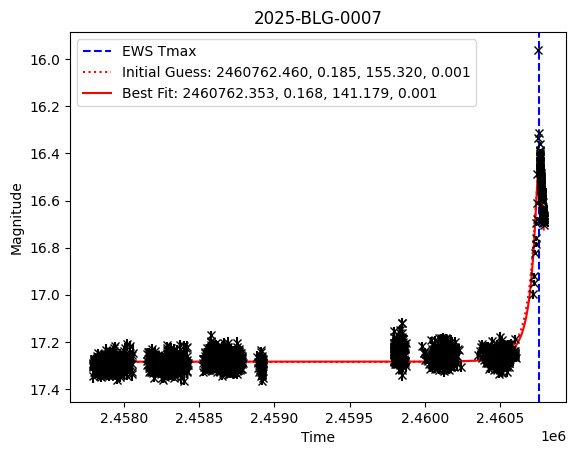


 2025-BLG-0007
-----------------
t_0: 2460762.353
u_0: 0.168
t_E: 141.179
rho: 0.001
-----------------
Time elapsed: 9.642503499984741 seconds
-----------------
FS: 18.44393756273953, FB: 58.51569549061416
chi2 =  18258.849947548693
-----------------
Initial chi2: 19299.925011041632
Final chi2: 18258.849947548693
Delta chi2: -1041.075063492939
Delta chi2/dof:  -0.2668055006388875
-----------------


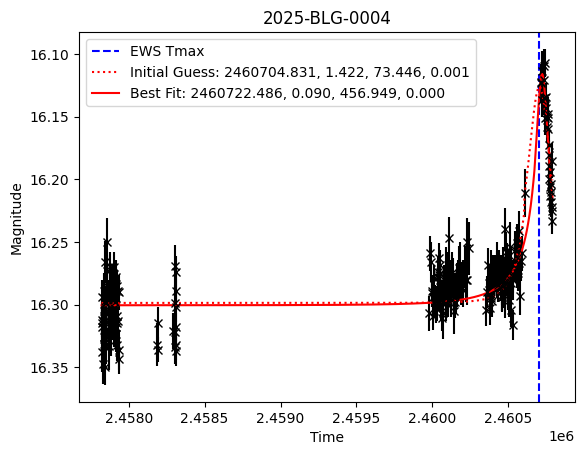


 2025-BLG-0004
-----------------
t_0: 2460722.486
u_0: 0.090
t_E: 456.949
rho: 0.000
-----------------
Time elapsed: 10.013371229171753 seconds
-----------------
FS: 3.2660433663971755, FB: 187.19532022370618
chi2 =  438.4333504320221
-----------------
Initial chi2: 526.5137016799399
Final chi2: 438.4333504320221
Delta chi2: -88.0803512479178
Delta chi2/dof:  -0.3495252033647532
-----------------

 2025-BLG-0008
-----------------
t_0: 2460737.787
u_0: 1.303
t_E: 7.844
rho: 0.054
-----------------
Time elapsed: 18.26059079170227 seconds
-----------------
FS: 123.07720001067874, FB: -114.3939014262023
chi2 =  8132.904935127797
-----------------
Initial chi2: 8257.975654326834
Final chi2: 8132.904935127797
Delta chi2: -125.07071919903683
Delta chi2/dof:  -0.032930679094006536
-----------------

 2025-BLG-0009
-----------------
t_0: 2461053.988
u_0: 0.229
t_E: 31.274
rho: 0.001
-----------------
Time elapsed: 18.930623054504395 seconds
-----------------
FS: 589.6279005405946, FB: -540.800

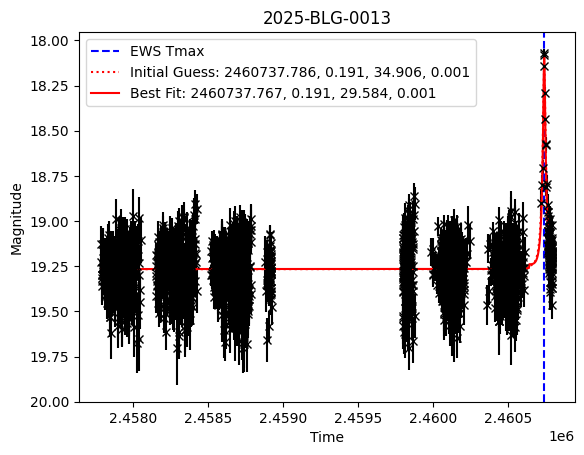


 2025-BLG-0013
-----------------
t_0: 2460737.767
u_0: 0.191
t_E: 29.584
rho: 0.001
-----------------
Time elapsed: 24.346482038497925 seconds
-----------------
FS: 5.706351876184274, FB: 6.704525402153691
chi2 =  7217.7229189656355
-----------------
Initial chi2: 7263.438799945881
Final chi2: 7217.7229189656355
Delta chi2: -45.715880980245856
Delta chi2/dof:  -0.01177940762181032
-----------------


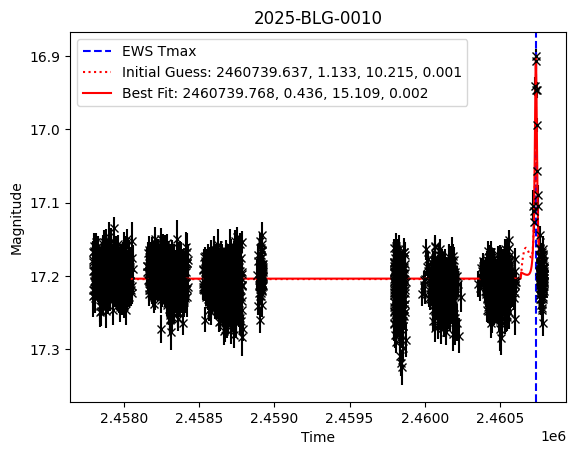


 2025-BLG-0010
-----------------
t_0: 2460739.768
u_0: 0.436
t_E: 15.109
rho: 0.002
-----------------
Time elapsed: 25.24581742286682 seconds
-----------------
FS: 18.858253350723476, FB: 64.02209724278359
chi2 =  7435.755502810828
-----------------
Initial chi2: 8491.554145744958
Final chi2: 7435.755502810828
Delta chi2: -1055.79864293413
Delta chi2/dof: 

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:851: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


 -0.270717600752341

-----------------
 2025-BLG-0014
-----------------
t_0: 2460740.627
u_0: 2.032
t_E: 92.458
rho: 0.001
-----------------
Time elapsed: 25.39340901374817 seconds
-----------------
-----------------
Initial chi2: 45254.54262020202
Final chi2: 45254.54262020202
Delta chi2: 0.0
Delta chi2/dof:  0.0
-----------------

 2025-BLG-0015
-----------------
t_0: 2460717.433
u_0: 0.253
t_E: 34.014
rho: 0.009
-----------------
Time elapsed: 33.99207139015198 seconds
-----------------
FS: 126.48774186860207, FB: 5.213267397154003
chi2 =  7773.717507596205
-----------------
Initial chi2: 10574.294887469905
Final chi2: 7773.717507596205
Delta chi2: -2800.5773798737
Delta chi2/dof:  -0.7186495714328202
-----------------

 2025-BLG-0011
-----------------
t_0: 2460746.611
u_0: 2.000
t_E: 6.359
rho: 0.055
-----------------
Time elapsed: 34.21515703201294 seconds
-----------------
FS: 252.34093799596155, FB: -229.843744418234
chi2 =  12189.5318878434
-----------------
Initial chi2: 12348

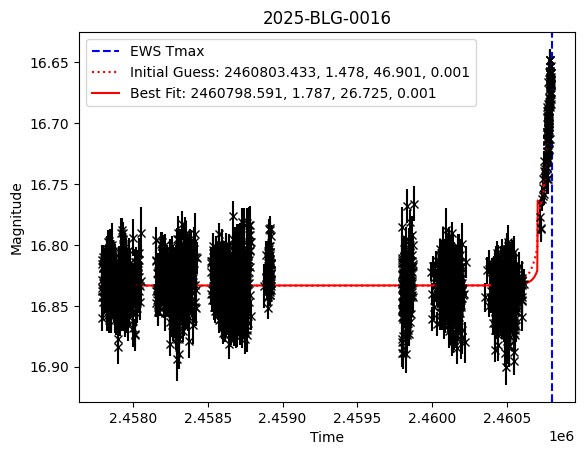


 2025-BLG-0016
-----------------
t_0: 2460798.591
u_0: 1.787
t_E: 26.725
rho: 0.001
-----------------
Time elapsed: 38.81589484214783 seconds
-----------------
FS: 219.82947809466094, FB: -103.23874679175177
chi2 =  8658.18706746803
-----------------
Initial chi2: 8791.762588494617
Final chi2: 8658.18706746803
Delta chi2: -133.575521026587
Delta chi2/dof:  -0.038627970221685085
-----------------

 2025-BLG-0017
-----------------
t_0: 2460772.576
u_0: 0.358
t_E: 28.829
rho: 0.001
-----------------
Time elapsed: 42.97821354866028 seconds
-----------------
FS: 57.715483534468, FB: -9.384885451616764
chi2 =  11221.064890789894
-----------------
Initial chi2: 14450.383265327022
Final chi2: 11221.064890789894
Delta chi2: -3229.318374537128
Delta chi2/dof:  -0.8250685678429044
-----------------

 2025-BLG-0021
-----------------
t_0: 2460745.733
u_0: 0.085
t_E: 17.925
rho: 0.019
-----------------
Time elapsed: 46.18281626701355 seconds
-----------------
FS: 6.720932188026281, FB: 13.227328354

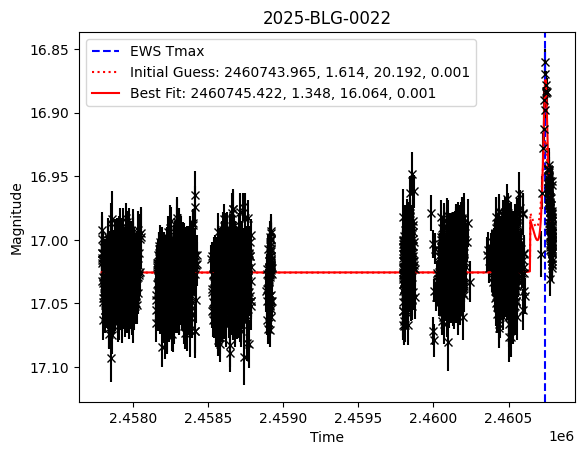


 2025-BLG-0022
-----------------
t_0: 2460745.422
u_0: 1.348
t_E: 16.064
rho: 0.001
-----------------
Time elapsed: 52.618255615234375 seconds
-----------------
FS: 82.75150318002596, FB: 14.913804802208222
chi2 =  7124.675072429297
-----------------
Initial chi2: 7326.594503926912
Final chi2: 7124.675072429297
Delta chi2: -201.91943149761482
Delta chi2/dof:  -0.05192065608064151
-----------------

 2025-BLG-0023
-----------------
t_0: 2460747.305
u_0: 0.017
t_E: 11.830
rho: 0.002
-----------------
Time elapsed: 58.63099551200867 seconds
-----------------
FS: 21.60814325189717, FB: 11.614644952216148
chi2 =  8301.346892432803
-----------------
Initial chi2: 8592.766120118515
Final chi2: 8301.346892432803
Delta chi2: -291.41922768571203
Delta chi2/dof:  -0.07514678382818774
-----------------


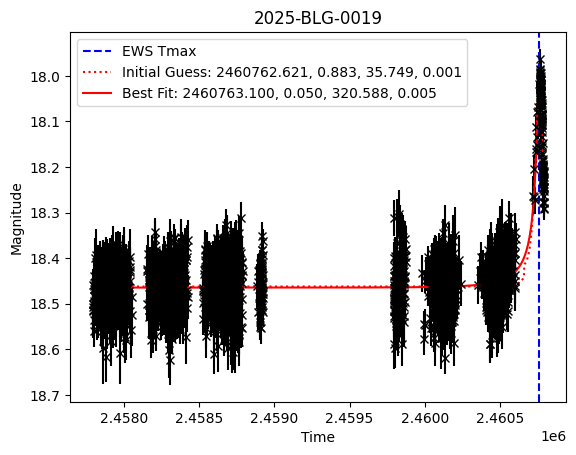


 2025-BLG-0019
-----------------
t_0: 2460763.100
u_0: 0.050
t_E: 320.588
rho: 0.005
-----------------
Time elapsed: 59.46495485305786 seconds
-----------------
FS: 0.731628696552687, FB: 25.22123768807581
chi2 =  5885.225729777531
-----------------
Initial chi2: 6138.5142191541345
Final chi2: 5885.225729777531
Delta chi2: -253.28848937660314
Delta chi2/dof:  -0.06484600342462958
-----------------

 2025-BLG-0024
-----------------
t_0: 2460742.076
u_0: 0.876
t_E: 15.000
rho: 0.001
-----------------
Time elapsed: 61.43648076057434 seconds
-----------------
FS: 34.463611109636, FB: 62.17672717396388
chi2 =  6531.835841468744
-----------------
Initial chi2: 6837.331895777917
Final chi2: 6531.835841468744
Delta chi2: -305.4960543091738
Delta chi2/dof:  -0.13452049947563796
-----------------

 2025-BLG-0020
-----------------
t_0: 2460778.510
u_0: 0.157
t_E: 86.645
rho: 0.001
-----------------
Time elapsed: 64.64010572433472 seconds
-----------------
FS: 78.64129208584976, FB: 39.4725310648

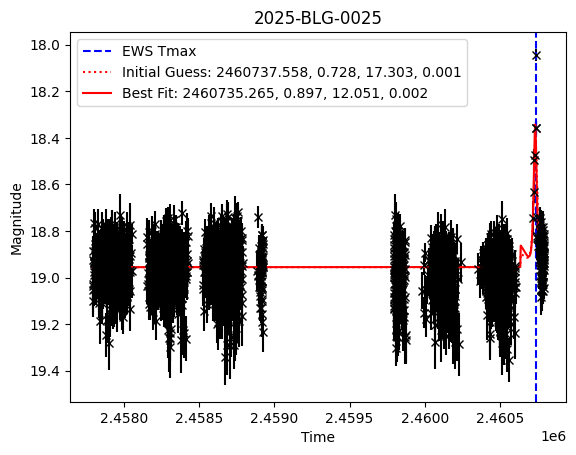


 2025-BLG-0025
-----------------
t_0: 2460735.265
u_0: 0.897
t_E: 12.051
rho: 0.002
-----------------
Time elapsed: 69.33327293395996 seconds
-----------------
FS: 29.31391914070428, FB: -12.79830162417455
chi2 =  7812.470651637963
-----------------
Initial chi2: 7854.466144819059
Final chi2: 7812.470651637963
Delta chi2: -41.99549318109621
Delta chi2/dof:  -0.010801309974561782
-----------------

 2025-BLG-0030
-----------------
t_0: 2460747.612
u_0: 1.999
t_E: 27.815
rho: 0.009
-----------------
Time elapsed: 71.11557459831238 seconds
-----------------
FS: 3241.0190854781017, FB: -2130.973047719963
chi2 =  7802.317279480126
-----------------
Initial chi2: 8756.794541392232
Final chi2: 7802.317279480126
Delta chi2: -954.4772619121059
Delta chi2/dof:  -1.1295588898368116
-----------------

 2025-BLG-0026
-----------------
t_0: 2460746.884
u_0: 0.164
t_E: 31.946
rho: 0.001
-----------------
Time elapsed: 72.91487765312195 seconds
-----------------
FS: 3.701726726881912, FB: 11.59505265

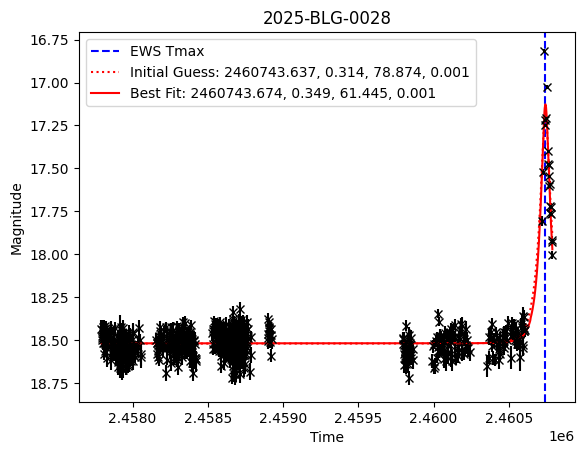


 2025-BLG-0028
-----------------
t_0: 2460743.674
u_0: 0.349
t_E: 61.445
rho: 0.001
-----------------
Time elapsed: 78.86251521110535 seconds
-----------------
FS: 32.30772562871651, FB: -7.641378045074727
chi2 =  3868.515337673651
-----------------
Initial chi2: 4060.261339199601
Final chi2: 3868.515337673651
Delta chi2: -191.74600152594985
Delta chi2/dof:  -0.26052445859504053
-----------------


ValueError: could not broadcast input array from shape (4,) into shape (3,)

In [16]:
# Main function to parallelize the processing
def run_parallel_processing(plot_fraction=None, kill_after=None):
    # numpy array for the fit params
    fit_params = np.zeros((ews_df.shape[0], 3))

    if plot_fraction is None:
        plot_fraction = 0.1
    if kill_after is None:
        kill_after = 30

    start_time = time.time()

    # Create a pool of worker processes
    print(mp.cpu_count())
    with Pool(processes=mp.cpu_count()) as pool: # if running locally, keep the
                                                 # process count < mp.cpu_count()
                                                 # or it will be very slow
        results = pool.map(lambda i: process_event(i, ews_df, N*plot_fraction, start_time), range(kill_after))
        for i, params in results:
            fit_params[i] = params

    print("Total time:", time.time() - start_time)

    # Save fit_params if needed
    # np.save('fit_params.npy', fit_params)

    return fit_params

# Run the parallel processing function
fit_params = run_parallel_processing() # test run
#fit_params = run_parallel_processing(kill_after=ews_df.shape[0],
#                                     plot_fraction=0.01
#                                     ) # full run

#print(fit_params[:n_10])

In [ ]:
plt.close(99)
plt.figure(99)
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

# t_0 values
min_t0 = min(fit_params[:, 0])
max_t0 = max(fit_params[:, 0])
print(min_t0, max_t0)
axes[0].hist(fit_params[:,0], bins=20)
axes[0].set_xlabel(r'$t_0$')
axes[0].set_ylabel('Frequency')
#log the y axis
axes[0].set_yscale('log')

# u0 values
min_u0 = min(fit_params[:, 1])
max_u0 = max(fit_params[:, 1])
print(min_u0, max_u0)
axes[1].hist(fit_params[:,1], bins=20)
axes[1].set_xlabel(r'$u_0$')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')

# tE values
min_tE = min(fit_params[:, 2])
max_tE = max(fit_params[:, 2])
print(min_tE, max_tE)
axes[2].hist(fit_params[:,2], bins=20)
axes[2].set_xlabel(r'$t_\textrm{E}$')
axes[2].set_ylabel('Frequency')
axes[2].set_yscale('log')

# rho values
min_rho = min(fit_params[:, 3])
max_rho = max(fit_params[:, 3])
print(min_rho, max_rho)
axes[3].hist(fit_params[:,3], bins=20)
axes[3].set_xlabel(r'$\rho$')
axes[3].set_ylabel('Frequency')
axes[3].set_yscale('log')

plt.show()

In beta testing, the timing results for fitting 30 events were:

| Processing | Cores | Events (N) | Plots | Time |
| :-: | :-: | :-: | :-: | :-: |
| Serial | 1 | 30 | 10% | 104s |
| Parallel | 2 | 30 | 10% | 94s |

A modest improvement, considering the extra coding overhead. However, on a local machine with more cores:

| Processing | Cores | Events (N) | Plots | Time |
| :-: | :-: | :-: | :-: | :-: |
| Serial | 1 | 30 | 10% | s |
| Parallel | 7 | 30 | 10% |	s |

This shows the real power of parallelisation—when the hardware can actually support it.

If you even encounter this kind of problem in the wild, where you a very parallelisable job with limited time to implement parallelization, it's always worth considering poor-man parallelisation:
Break the job into batches, run multiple scripts or terminals at once, and let your operating system juggle the rest.

If your code is loop heavy, look for vectorisation opportunities using `numpy`.
Or `cython`, if that's not an option.

Now that you've seen how parallelisation affects efficiency, you're ready to run a full-season fit.
However, if you're short on time, it's entirely reasonable to skip this exercise.

> **Exercise X**
>
> Use the more efficient method (serial or parallel) to process the full season of EWS data.
> Plot histograms of the resulting parameter distributions (e.g., $t_\textrm{E}$, $u_0$, etc.).
> Look for trends. Look for outliers.

### <font face="Helvetica" size="5"> 3.4 Custom Event Finder </font>

If we weren't borrowing initial fit parameters from the OGLE EWS, these fits would fail completely under downhill optimizers. Starting too far from the truth in parameter space means the optimizer gets trapped in local minima - the peaks and valleys of the likelihood landscape become a cage, not a guide.

We'll explore more robust (and computationally expensive) methods in the next section. But even with advanced samplers, having a good initial guess makes the entire process faster, more stable, and more scientifically honest.

Different ground-based surveys use different strategies to identify microlensing events in stellar light curves. You, however, have a luxury they don't: you already know which light curves contain events. That means your challenge isn't classification—it's localization.

And the most critical parameter to localize is $t_0$.  
Other parameters (like $u_0$, $t_\textrm{E}$, and $\rho$) can be guessed with population-based heuristics. But if your $t_0$ is wrong, your fit will miss the peak entirely - and what you get back will be noise-dressed nonsense.

This is a central problem in bulk fitting single-lens microlensing events:  
> We need an event-finding algorithm to guess $t_0$ accurately.

You now have:
- A full season of OGLE data
- Light curves that are guaranteed to contain events
- A set of academic papers describing common event-finding strategies:
  - [OGLE Early Warnign System (EWS)](https://ui.adsabs.harvard.edu/abs/1994AcA....44..227U/abstract)
  - [KMTNet Alert Finder](https://ui.adsabs.harvard.edu/abs/2018arXiv180607545K/abstract)
  - [KMTNet Event Finder](https://ui.adsabs.harvard.edu/abs/2018AJ....155...76K/abstract)
  - [KMTNet Anomaly Finder](https://ui.adsabs.harvard.edu/abs/2021AJ....162..163Z/abstract)
  - [RTModel (Real-Time Modeling)](https://ui.adsabs.harvard.edu/abs/2024A%26A...688A..83B/abstract) (see their section 4)

Do you think you can do better?

> **Exercise X**
>
> Write an algorithm to estimate $t_0$ for microlensing events.  
> Keep it simple. Keep it efficient.  
> The rest of your fit may depend on it.

In [ ]:
#@title Your code goes here

### <font face="Helvetica" size="5">3.4 Advanced Modeling Techniques and Higher-Order Models</font>

The idea that a good $t_0$ guess is enough for a good fit holds true for FSPL events. But when an FSPL model fails to fit cleanly, that's often a sign that higher-order effects are at play. You've encountered some of these in other chapters of this course.

We know that binary stars are common in the galaxy. And yet, we often model events using PSPL or FSPL, as if single-lens-single-source events are the default. In fact, recent simulations of ground-based surveys using modern Galactic models suggest that around 50% of single-peaked microlensing events are actually "hidden binaries"—either:
- **Binary lenses** (multiple objects in the lens system), or  
- **Binary sources** (two source stars lensed simultaneously).

#### <font face="Helvetica" size="4"> Binary source stars </font>
They introduce subtle distortions to the light curve and can easily masquerade as single-lens, binary-lens events.  

If you'd like to learn more, see this [notebook on binary sources](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/main/Notebooks/BinarySource.ipynb).

#### <font face="Helvetica" size="4"> Binary lenses </font>
These are a different beast entirely. They require:
- Higher-order models
- Optimizers that can escape local minima (e.g. **Monte Carlo** methods that allow uphill steps)

  ([This notebook](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/main/Notebooks/Modelling.ipynb) on modelling methods commonly used in microlensing may also be of interest)
- Often a **grid search** in $s$, $q$, and $\rho$ to even get reasonable initial conditions

Even with that, **degeneracies are common** — and easy to miss. For example, see the modeling of OGLE-2016-BLG-1195 (Shartzvald et al., 2017; Bond et al., 2017; Gould et al., 2023; Vandorou et al., 2024), where a viable degenerate solutions were overlooked at each stage of modelling.

If a light curve shows dramatic deviations from a Paczyński shape, you're **almost certainly dealing with a binary lens** (unless some other astrophysical event has contaminated your lightcurve). But determining the *correct* model requires balancing:
- Evidence for complexity, and  
- The principle of parsimony (Occam's Razor), while knowing full well that these “complex” models are not **rare.**

---

For more on Bayesian modeling and MC methods in microlensing, see our [modeling notebook](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/main/Notebooks/Modelling.ipynb).

---

#### Other higher-order effects not covered in this course (but worth knowing):
- **Lens orbital motion**  
- **Xallarap** (source orbital motion)  
- **Multiple lenses** (e.g. triple lenses)  
- **Variable stars** (source, lens, or blend stars with intrinsic variability)  
- Variable **blending** (ambient stars moving in/out of the aperture/PSF)  
- General data **systematics**  



## <font face="Helvetica" size="6"> 4. Full Season *Roman* Fit </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

First, the data. There is a repo full of *Roman*-like light curves from the 2018 WFIRST Data Challenge. We start our mini data challenge by cloning that and pulling out all the relavent lightcurves. Feel free to blindly `SHFT` + `ENTR` your way through this part until you get to Section 4.2.

### <font face="Helvetica" size="5"> 4.1 Getting the data </font>

In [ ]:
#@title Cloning the GitHub Repository

# clone the microlensing data challenge repo
!git clone https://github.com/microlensing-data-challenge/data-challenge-1.git

# Extract the lightcurve files
!tar -xzvf data-challenge-1/lc.tar.gz -C data-challenge-1/


In [ ]:
#@title Displaying PDFs in a notebook (browser dependent compatability)
#from IPython.display import IFrame
#
## Assuming the PDF is in the current working directory
#pdf_path = "data-challenge-1/Answers/DataChallenge2019_Summary_byJenniferYee.pdf"
#
## Display the PDF using IFrame
#IFrame(pdf_path, width=800, height=600)

This dataset includes 293 lightcurve, 74 of which are single lens events. We can cheat a little and specifically pull out the events that we know to be single lenses, keeping the challenge tractable for completion within the hour, with the added benefit of making the strangley organized `master_file.txt` easier to wrangle.

In [ ]:
#@title Putting everything in a tidy data frame

master_file = '/content/data-challenge-1/Answers/master_file.txt'
header_file = '/content/data-challenge-1/Answers/wfirstColumnNumbers.txt'

rows = []
with open(master_file, "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comment lines
        if not line or line.startswith("#"):
            continue

        tokens = line.split()  # split on whitespace
        # Keep only single-lens events
        if "dcnormffp" not in tokens:
            continue

        # Single-lens lines should have exactly 96 columns
        if len(tokens) != 96:
            continue

        rows.append(tokens)

df_sl = pd.DataFrame(rows)

# make an array of zeros with 97 elements
colnames_96 = np.zeros(96, dtype=object)

# Read the header file
with open(header_file, 'r') as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comments
        if not line or line.startswith('#'):
            continue
        # The second token is the 'name'
        parts = line.split()
        colnames_96[int(parts[0])] = parts[1]

#For single lenses they are (***Note for these, the mass of the lens is given by the planet mass column, not the host mass column):
#72 - unimportant
#73 - N, number of consecutive W149 data points deviating by >=3 sigma from a flat line
#74 - unimportant
#75 - Delta chi^2 (relative to a flat line)
#76-91 - unimportant
#92 - simulated event type (dcnormffp = single lens or free-floating planet)
#93 - unimportant (I think)
#94 - lightcurve filename root
#95 - Data challenge lightcurve number

# Replace the column names in colnames_96
colnames_96[73] = 'N'
colnames_96[75] = 'Delta chi2'
colnames_96[92] = 'sim type'
colnames_96[94] = 'filename'
colnames_96[95] = 'lc_number'

# Make sure the column names are unique
for i in range(94):
    if colnames_96[i] == '|' or colnames_96[i] == 0:
        colnames_96[i] = 'col_' + str(i)

# Replace the column names in the data_frame
df_sl.columns = colnames_96

# Remove the dummy columns 'col_*'
df_sl = df_sl.loc[:, ~df_sl.columns.str.startswith('col_')]

df_sl


The last column in this data frame has the lightcurve number, which we can use to pick out just single-lens lightcurves for analysis.

In [ ]:
#@title Figuring out which files we want

lc_number = df_sl['lc_number'].to_numpy()

lc_file_path_format = 'data-challenge-1/lc/ulwdc1_XXX_filter.txt'

lc_file_paths_W149 = [lc_file_path_format.replace('filter', 'W149')] * len(lc_number)
lc_file_paths_Z087 = [lc_file_path_format.replace('filter', 'Z087')] * len(lc_number)

# replace XXX, from the right, with the lc_number which is not necessarily of length 3
lc_file_paths_W149 = [path.replace('XXX', str(num).zfill(3)) for path, num in zip(lc_file_paths_W149, lc_number)]
lc_file_paths_Z087 = [path.replace('XXX', str(num).zfill(3)) for path, num in zip(lc_file_paths_Z087, lc_number)]

df_sl['lc_file_path_W149'] = lc_file_paths_W149
df_sl['lc_file_path_Z087'] = lc_file_paths_Z087

df_sl

There are a few pieces of information that may need to be known for each event that are not in the lightcurve files. These are stored in event_info.txt

Columns: `"Event_name"` `"Event_number"` `"RA_(deg)"` `"Dec_(deg)"` `"Distance"` `"A_W149"` `"sigma_A_W149"` `"A_Z087"` `"sigma_A_Z087"`

Distance, A_W149/Z087 are an estimate of the distance and extinction in each band of the red clump stars. sigma_A_W149/Z087 are dispersions in the extinction.

In [ ]:
#@title Event information data frame

header = ["Event_name",
          "Event_number",
          "RA_(deg)",
          "Dec_(deg)",
          "Distance",
          "A_W149",
          "sigma_A_W149",
          "A_Z087",
          "sigma_A_Z087"
]

event_info = pd.read_csv('./data-challenge-1/event_info.txt', names=header, delim_whitespace=True)
event_info

In [ ]:
#@title Combining the two data frames

# Convert 'lc_number' to numeric type before merging
merged_df = pd.merge(event_info, df_sl.astype({'lc_number': 'int64'}), left_on='Event_number', right_on='lc_number', how='inner')
merged_df

Great - data successfully wrangled. Let's forget we ever had to live through that and move right along.

### <font face="Helvetica" size="5"> 4.2 Adjusting the model for L2 an orbit </font>

Next, we need to make a minor adjustment to our model for data that is not ground based.

In [ ]:
# Here is the main difference - we provide the ephemeris for Roman:
DATA_PATH = lc_file_paths_W149[0]

file_Roman_eph_W149 = join(
    mm.DATA_PATH, 'W149_ephemeris_files', 'wfirst_ephemeris_W149.txt')
file_Roman_eph_W149 = join(
    mm.DATA_PATH, 'W149_ephemeris_files', 'wfirst_ephemeris_W149.txt')
data_Roman_W149 = mm.MulensData(
    file_name=, ephemerides_file=file_spitzer_eph,
    plot_properties={'label': 'Roman W149'})

data_object = MulensModel.MulensData(
    data_list=[times, mags, errors],
    phot_fmt='mag',  # or 'flux' – confirm
    bandpass='H',    # or whatever Roman used in your sim
    plot_properties={
        'color': 'navy',
        'label': 'Roman Sim',
        'marker': 'o',
        'markersize': 2
    }
)

# the new model
Roman_model = mm.Model({**params}, coords=coords,
                       ephemerides_file=file_spitzer_eph)

### <font face="Helvetica" size="5"> 4.3 Do it </font>

This is it. You have every thing you need to fit a full season of single lens. And this is the part where we push the baby bird out of the nest. No more hand-holding. No sample answers. Just do it.

I believe in you.

> **Exercise X**
>
> Perform FSPL on the provided simulated Roman single-lens events.
>
> *Note. Don't forget to save you best fit parameters for later inspection.

In [ ]:
#@title Your code goes here

### <font face="Helvetica" size="5"> 4.4 How did you do? </font>

The next step is evalutaing how well your bulk fit went. Some simple histograms of model parameters, should do the trick.

> **Exercise X**
>
> Make overlayed histograms of the true parameters distributions and your best-fit parameter distributions to evaluate the sucess of your algoryhthms.

In [ ]:
#@title Your code goes here

<!-- ## <font face="Helvetica" size="6"> 5. Meta Analysis </font>*italicized text*
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Your full season fit is probably going to take some serious timme to finish, so we have included this section purely as a homework exercise. -->

Well done for completing this notebook. If you enjoyed the challenge or feel like you would like to try to improve your approach - if you think you can do better than the current microlensing fitting approaches - look out for the Roman Microlensing Data Challenge comming out in September.